### Load Library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, GRU
from tqdm.notebook import tqdm

### Read the dataset

In [3]:
dataset = pd.read_excel('DATASET KOMODITAS GROCERY + KATEGORI.xlsx')

In [4]:
isan = dataset.iloc[0:, 5:].transpose()
print(isan.shape)

(108, 87)


In [5]:
data = isan.iloc[0:, 0:1]
data

,0
2013-01-01,52611
2013-02-01,60548
2013-03-01,59561
2013-04-01,63059
2013-05-01,62385
...,...
2021-08-01,65668
2021-09-01,60112
2021-10-01,63743
2021-11-01,60778


### Parameter: Lookback 12 month windows

In [6]:
lookback_window = 12 

### Convert Data into Numpy Array

In [7]:
data = data.values

In [8]:
len(data)

108

### Convert in to X, y format

In [9]:
x = []
y = []
for i in tqdm(range(lookback_window, len(data))):
    x.append(data[i - lookback_window:i])
    y.append(data[i])

  0%|          | 0/96 [00:00<?, ?it/s]

### Generate Array of list x and y

In [10]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(96, 12, 1)
(96, 1)


### Model Design

In [12]:
i = Input(shape=(lookback_window, 1))
m = GRU(512, activation='relu')(i)
m = Dense(64, activation='linear')(m)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12, 1)]           0         
                                                                 
 gru_1 (GRU)                 (None, 512)               791040    
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 823,937
Trainable params: 823,937
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile('adam','mae')

### Start Training

In [14]:
model.fit(x, y, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 52ms/step - loss: 64424.5039
Epoch 2/100
3/3 [==============================] - 0s 52ms/step - loss: 49762.6758
Epoch 3/100
3/3 [==============================] - 0s 54ms/step - loss: 33006.6055
Epoch 4/100
3/3 [==============================] - 0s 51ms/step - loss: 10815.5400
Epoch 5/100
3/3 [==============================] - 0s 52ms/step - loss: 8257.4248
Epoch 6/100
3/3 [==============================] - 0s 50ms/step - loss: 6024.1704
Epoch 7/100
3/3 [==============================] - 0s 50ms/step - loss: 4409.2700
Epoch 8/100
3/3 [==============================] - 0s 52ms/step - loss: 5442.7563
Epoch 9/100
3/3 [==============================] - 0s 55ms/step - loss: 2196.3254
Epoch 10/100
3/3 [==============================] - 0s 49ms/step - loss: 2740.7659
Epoch 11/100
3/3 [==============================] - 0s 54ms/step - loss: 2437.2610
Epoch 12/100
3/3 [==============================] - 0s 57ms/step - loss: 2496.5803
Epoch 13/

### Performance Evaluation

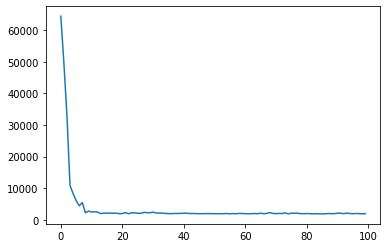

In [15]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Prediction with GRU Model

In [16]:
predict = model.predict(x)
# TODO: bikin predict 12 bulan

### Plot the Result

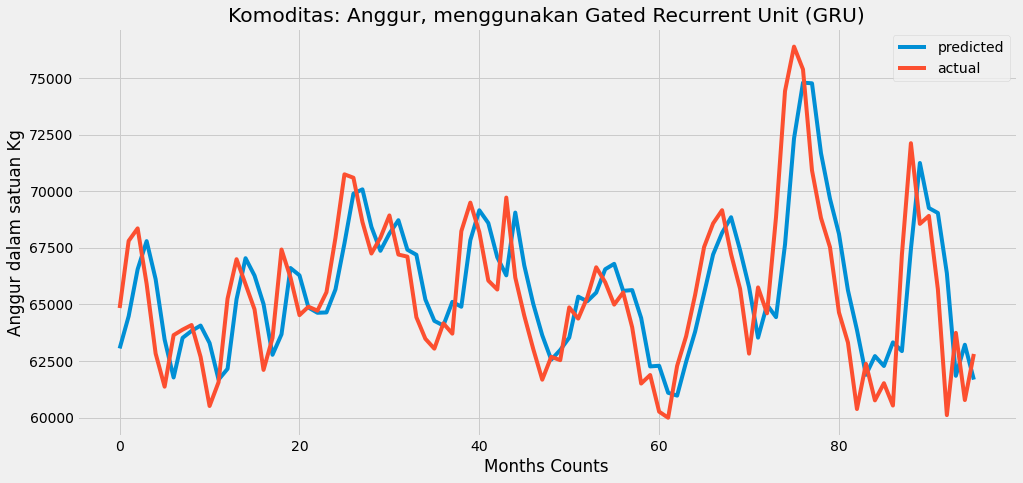

In [17]:
komoditas = [i for i in dataset['komoditas']]
satuan = [i for i in dataset['satuan']]
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.title('Komoditas: {}, menggunakan Gated Recurrent Unit (GRU)'.format(komoditas[0]))
plt.legend(['predicted', 'actual'])
plt.xlabel("Months Counts")
plt.ylabel("{} dalam satuan {}".format(komoditas[0], satuan[0]))
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y, predict))
print(rmse)

2285.842920776961


In [24]:
# export the model
model.save('GRU_Willy.h5')